Step 1: Load and Prepare the Data

In [2]:
import pandas as pd

# Load the data
file_path = '/Users/sohrabtellaie/Documents/GitHub/PrinciplesOfDataScienceCity/week07/censusCrimeClean.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


Step 2: Extract Numerical Data

In [3]:
# Drop the first column (non-numeric) and keep only numerical data
numerical_data = data.iloc[:, 1:]

# Display the numerical data
numerical_data.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


Step 3: PCA with Two Components

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize PCA
pca = PCA(n_components=2)

# Fit PCA without standardizing first
pca.fit(numerical_data)

# Check explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (Without Standardization):", explained_variance_ratio)
print("Total Variance Captured:", sum(explained_variance_ratio))

Explained Variance Ratio (Without Standardization): [0.67387831 0.08863102]
Total Variance Captured: 0.7625093340132286


Step 4: Standardize Data and Refit PCA

In [5]:
# Standardize the data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Refit PCA with standardized data
pca_standardized = PCA(n_components=2)
pca_standardized.fit(numerical_data_scaled)

# Check explained variance ratio after standardization
explained_variance_ratio_standardized = pca_standardized.explained_variance_ratio_
print("Explained Variance Ratio (With Standardization):", explained_variance_ratio_standardized)
print("Total Variance Captured (Standardized):", sum(explained_variance_ratio_standardized))

Explained Variance Ratio (With Standardization): [0.25267231 0.16667711]
Total Variance Captured (Standardized): 0.4193494208752469


Step 5: Transform Data and Visualize Principal Components

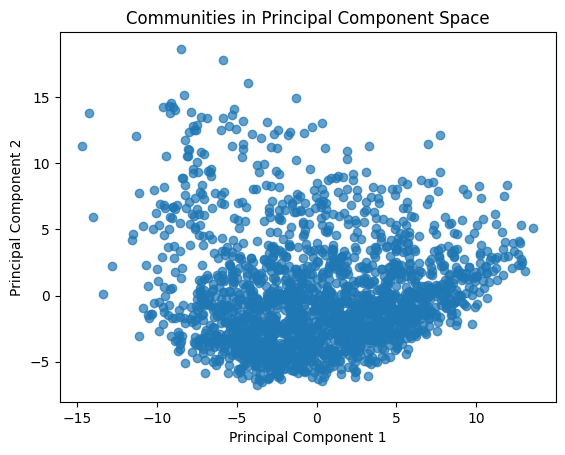

In [6]:
import matplotlib.pyplot as plt

# Transform data into the principal components
principal_components = pca_standardized.transform(numerical_data_scaled)

# Scatterplot of the two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.title('Communities in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [7]:
# Get loadings (contributions of each feature to the components)
loadings = pd.DataFrame(
    pca_standardized.components_,
    columns=numerical_data.columns,
    index=[f'PC{i+1}' for i in range(pca_standardized.n_components_)]
).T

# Convert to absolute values and sort by PC1
loadings_abs = loadings.abs().sort_values(by='PC1', ascending=False)

# Display the loadings
loadings_abs

,PC1,PC2
medFamInc,0.180802,0.060153
medIncome,0.179412,0.068525
PctKids2Par,0.174488,0.012355
pctWInvInc,0.173321,0.019820
PctPopUnderPov,0.172042,0.008457
...,...,...
PctWorkMomYoungKids,0.008579,0.067961
householdsize,0.008423,0.114270
fold,0.007828,0.004366
PctForeignBorn,0.003111,0.212684


Dominating Variable: medFamInc


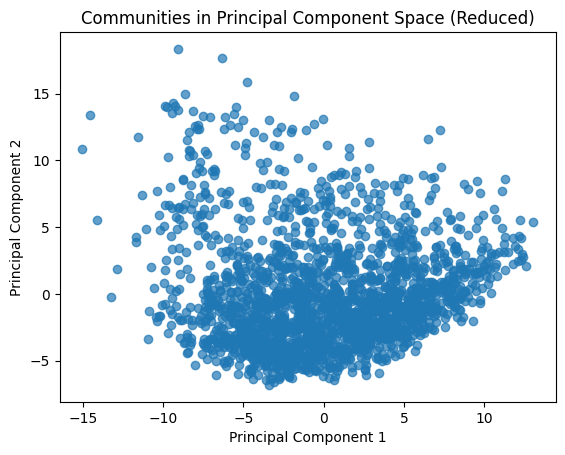

In [8]:
# Identify the dominating variable
dominating_variable = loadings_abs.index[0]
print(f"Dominating Variable: {dominating_variable}")

# Drop the dominating variable
numerical_data_reduced = numerical_data.drop(columns=[dominating_variable])

# Standardize and refit PCA
numerical_data_reduced_scaled = scaler.fit_transform(numerical_data_reduced)
pca_reduced = PCA(n_components=2)
pca_reduced.fit(numerical_data_reduced_scaled)

# Transform data and visualize again
principal_components_reduced = pca_reduced.transform(numerical_data_reduced_scaled)

# Scatterplot after removing dominating variable
plt.scatter(principal_components_reduced[:, 0], principal_components_reduced[:, 1], alpha=0.7)
plt.title('Communities in Principal Component Space (Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

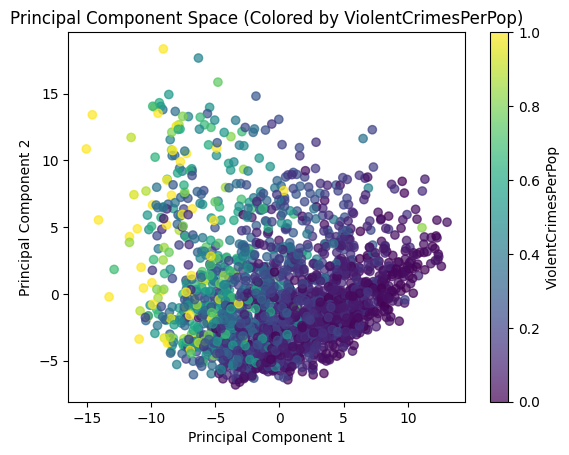

In [9]:
# Add 'ViolentCrimesPerPop' as color
plt.scatter(
    principal_components_reduced[:, 0],
    principal_components_reduced[:, 1],
    c=numerical_data['ViolentCrimesPerPop'],
    cmap='viridis',
    alpha=0.7
)
plt.title('Principal Component Space (Colored by ViolentCrimesPerPop)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='ViolentCrimesPerPop')
plt.show()